<h1><center> Car Price Prediction Multiple Linear Regression </center></h1>

## About Dataset

|-|Variable|Description|
|-|--------|-----------|
|1|Car_ID|Unique id of each observation |
|2|Symboling |Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.|
|3|carCompany|Name of car company|
|4|fueltype|Car fuel type i.e gas or diesel|
|5|aspiration|Aspiration used in a car|
|6|doornumber|Number of doors in a car |
|7|carbody|body of car|
|8|drivewheel|type of drive wheel|
|9|enginelocation|Location of car engine|
|10|wheelbase|Weelbase of car|
|11|carlength|Length of car|
|12|carwidth|Width of car|
|13|carheight|height of car|
|14|curbweight|The weight of a car without occupants or baggage.|
|15|enginetype|Type of engine|
|16|cylindernumber|cylinder placed in the car |
|17|enginesize|Size of car|
|18|fuelsystem|Fuel system of car|
|19|boreratio|Boreratio of car|
|20|stroke|Stroke or volume inside the engine |
|21|compressionratio|compression ratio of car|
|22|horsepower|Horsepower |
|23|peakrpm|car peak rpm |
|24|citympg|Mileage in city|
|25|highwaympg|Mileage on highway|
|26|price(Dependent variable)|Price of car |

**Problem Statement**
<br>A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.</br>

<br>They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:</br>

<br>Which variables are significant in predicting the price of a car?</br>
<br>How well those variables describe the price of a car?</br>



In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
#import opendatasets as od
#od.download('https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/download?datasetVersionNumber=1')

In [3]:
df = pd.read_csv('car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#display the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<li>Categorical, object(10): CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem </li>
<li>Continous, float64(8): wheelbase, carlength, carwidth, carheight, boreratio, stroke,  compressionratio, price </li>
<li>Discraete, int64(8): car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg </li>

## Data Wrangling

In [5]:
df.shape

(205, 26)

In [6]:
df.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
#check for missing values
#Which features contain blank, null or emply values?
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Unique Car company
df['CarName']=df['CarName'].str.split(' ',1,expand=True).drop(1,axis=1)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typo Error in CarName**
<li>maxda = mazda</li>
<li>Nissan = nissan</li>
<li>porsche = porcshe</li>
<li>toyato = toyouta</li>
<li>vokswagan = volkswagan = vw</li>

In [9]:
#REnaming the typo errors in CarName 
df['CarName'] = df['CarName'].replace({'maxda':'mazda','nissan':'Nissan','porcshe':'porsche','toyouta':'toyota','vokswagan':'volkswagen','vw':'volkswagen'})

In [10]:
# changing the datatype of symboling as it is categorical variable as per dictionary file
df['symboling'] = df['symboling'].astype(str)

In [11]:
#dropped car_ID 
df = df.drop('car_ID',axis=1)

In [12]:
#checking for duplicates
print(df.loc[df.duplicated()])

Empty DataFrame
Columns: [symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 25 columns]


In [13]:
# Segregation of Numerical and Categorical Variables/Columns
cat_col = df.select_dtypes(include=['object']).columns
con_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_con = df[con_col]
y = df_con['price']
df_con = pd.DataFrame(df[con_col].drop(columns='price'))

In [14]:
df_con.info()
print('____________________')
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 20.9 KB
____________________
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.

## Dummy Variable

In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [15]:
cat_dum = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [16]:
dummies = pd.get_dummies(df[cat_dum], dummy_na=True).astype('float64')

In [17]:
# Drop the original cat variables as dummies are already created
df.drop(cat_dum,axis=1,inplace=True)
df.shape

(205, 14)

## Remove outliers 

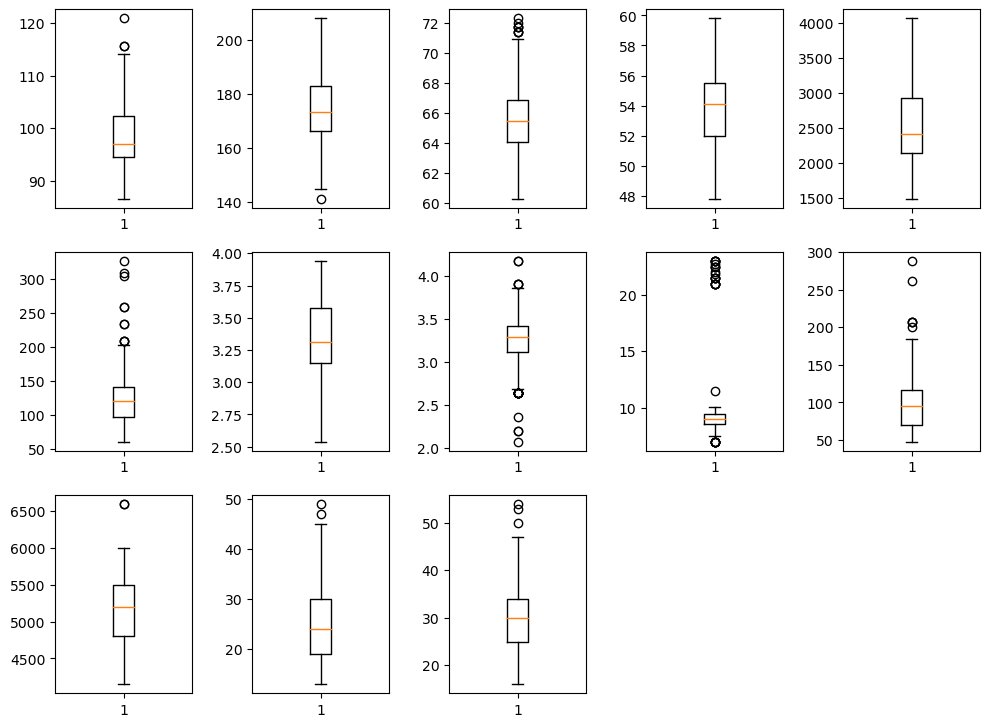

In [18]:
#Dist plot of all features
#boxplot of the data
plt.figure(figsize=(10, 12))
dfg = df_con.values
for i in range(dfg.shape[1]):
    plt.subplot(5,5,i+1)
    plt.boxplot(dfg[:,i])

plt.tight_layout()
plt.show()

In [19]:
#remove outliers using IQR
Q1 = df_con.quantile(0.25)
Q3 = df_con.quantile(0.75)
IQR = Q3 - Q1 
df_con = df_con[~((df_con < (Q1 - 1.5 * IQR)) |(df_con > (Q3 + 1.5 * IQR))).any(axis=1)]

## Normal Distribution Test

In [20]:
from scipy import stats
from scipy.stats import normaltest

In [21]:
for i in df_con.columns.values:
    a,b = stats.normaltest(df[[i]])
    alpha = 0.5
    print('p-value for',[i],'=','%.4f' %(b))
    if b < alpha:
        print('  The null hypothesis can be rejected*')
    else:
        print('  The null hypothesis can be accepted')

p-value for ['wheelbase'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['carlength'] = 0.6443
  The null hypothesis can be accepted
p-value for ['carwidth'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['carheight'] = 0.2747
  The null hypothesis can be rejected*
p-value for ['curbweight'] = 0.0009
  The null hypothesis can be rejected*
p-value for ['enginesize'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['boreratio'] = 0.0010
  The null hypothesis can be rejected*
p-value for ['stroke'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['compressionratio'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['horsepower'] = 0.0000
  The null hypothesis can be rejected*
p-value for ['peakrpm'] = 0.8331
  The null hypothesis can be accepted
p-value for ['citympg'] = 0.0004
  The null hypothesis can be rejected*
p-value for ['highwaympg'] = 0.0041
  The null hypothesis can be rejected*


## Transforms Data Into a Normal Distribution

In [22]:
from sklearn.preprocessing import QuantileTransformer

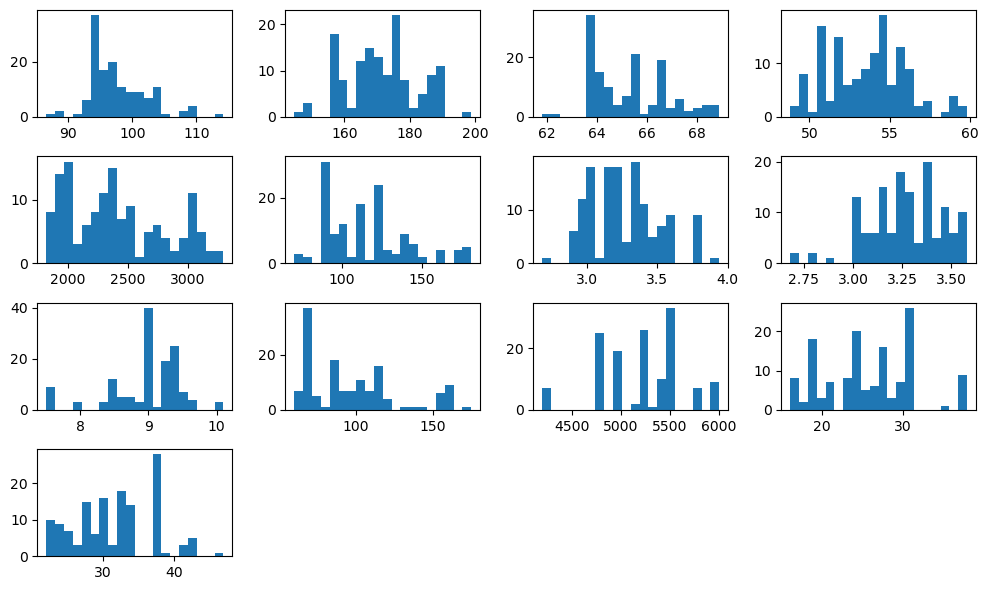

In [23]:
#plot histogram
plt.figure(figsize=(10, 6))
dfg = df_con.values
for i in range(dfg.shape[1]):
    plt.subplot(4,4,i+1)
    plt.hist(dfg[:,i],bins=20)

plt.tight_layout()
plt.show()

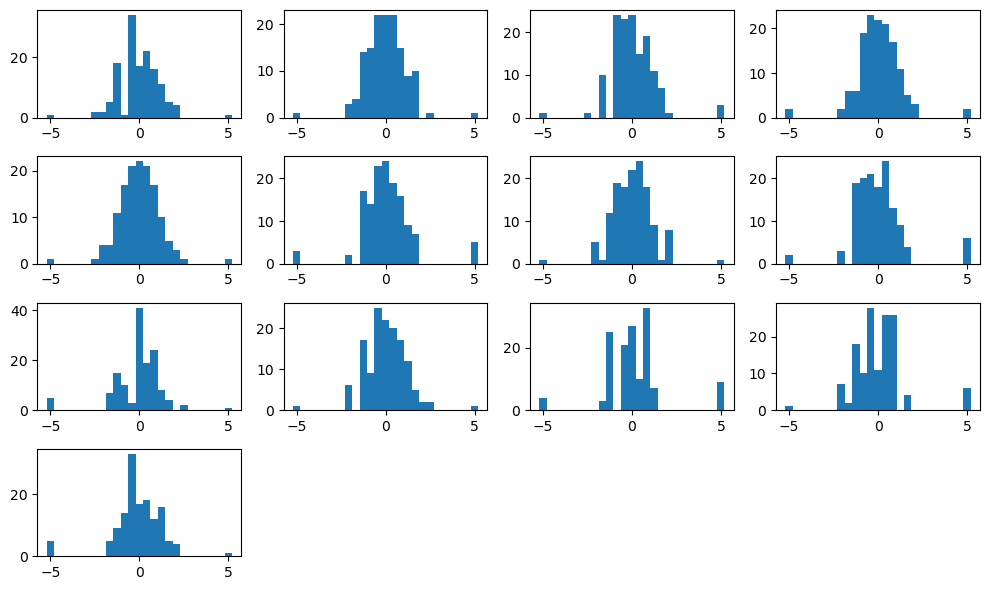

In [24]:
#tranform data to a normal distribution
qt = QuantileTransformer(n_quantiles=100, output_distribution="normal", random_state=42)

df_con_trans = qt.fit_transform(df_con)

# histogram of the transformed data
plt.figure(figsize=(10, 6))

for i in range(df_con_trans.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.hist(df_con_trans[:,i], bins=25)
    
plt.tight_layout()
plt.show()

In [25]:
#convert NumPy Array to Pandas DataFrame
con = pd.DataFrame(df_con_trans, columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])

<AxesSubplot: >

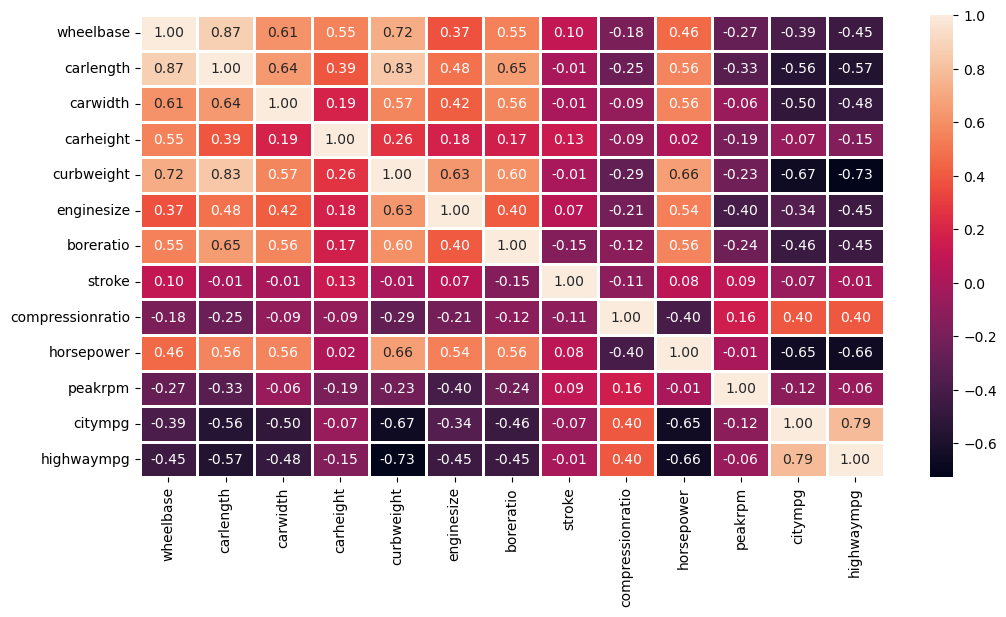

In [26]:
#find correlated columns
plt.figure(figsize=(12,6))
sns.heatmap(con.corr(), annot=True, fmt='.2f', linewidths=2)

In [27]:
#create a new dataset with transfrom and dummy variables
X_multi = pd.concat([con, dummies], axis=1)

In [28]:
X_multi.drop(['symboling_nan', 
        'CarName_nan', 
        'fueltype_nan',
        'aspiration_nan',
        'doornumber_nan',
        'carbody_nan',
        'drivewheel_nan',
        'enginelocation_nan',
        'enginetype_nan',
        'cylindernumber_nan',
        'fuelsystem_nan'], axis=1 ,inplace=True)
              
print('X_multi.shape: ',X_multi.shape)
print('y.shape: ',y.shape)

X_multi.shape:  (205, 81)
y.shape:  (205,)


In [29]:
#clean missing after transform data
#Total missing values for each feature
print(X_multi.isnull().sum())

wheelbase          66
carlength          66
carwidth           66
carheight          66
curbweight         66
                   ..
fuelsystem_idi      0
fuelsystem_mfi      0
fuelsystem_mpfi     0
fuelsystem_spdi     0
fuelsystem_spfi     0
Length: 81, dtype: int64


In [30]:
#Replace using median 
med = X_multi.median()
X_multi.fillna(med, inplace=True)

In [31]:
# Any missing values?
print(X_multi.isnull().values.any())
print('X_multi.shape:', X_multi.shape)
print('y.shape:',y.shape)

False
X_multi.shape: (205, 81)
y.shape: (205,)


In [32]:
print(X_multi.isna().sum())

wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 81, dtype: int64


## Multiple Linear Regression

$$
Y: Response \ Variable\\\\
X_{1} :Predictor\ Variable \ 1\\\\
X_{2}: Predictor\ Variable \ 2\\\\
: \\\\
X_{i}: Predictor\ Variable \ i\\\\
$$

$$
a: intercept\\\\
b_{1} :coefficients \ of\ Variable \ 1\\\\
b_{2}: coefficients \ of\ Variable \ 2\\\\
:\\\\
b_{i}: coefficients \ of\ Variable \ i\\\\
$$

The equation is given by:

$$
Yhat = a + b_{1} X_{1} + b_{2} X_{2} + ... + b_{i} X_{i}
$$

In [33]:
import statsmodels.api as sm

In [34]:
model = sm.OLS(y, X_multi).fit()
summary = model.summary()
print(summary)
#the null hypothesis is beta(i) = 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     31.80
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           9.45e-59
Time:                        23:32:42   Log-Likelihood:                -1846.9
No. Observations:                 205   AIC:                             3828.
Df Residuals:                     138   BIC:                             4051.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase               282.01

## Forward selection

In [35]:
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            # Change argmin -> idxmin
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add',format(best_feature),' with p-value:',format(best_pval))

        if not changed:
            break

    return included

forward_regression(X_multi, y)

Add cylindernumber_four  with p-value: 3.0882479387593776e-31
Add drivewheel_rwd  with p-value: 1.4743342871468722e-15
Add cylindernumber_eight  with p-value: 8.170162675479689e-10
Add cylindernumber_two  with p-value: 2.3919988853305593e-07
Add enginetype_rotor  with p-value: 2.3919988853307303e-07
Add CarName_jaguar  with p-value: 1.976896803236736e-05
Add enginelocation_front  with p-value: 8.967662529004289e-07
Add enginelocation_rear  with p-value: 4.290166176605369e-16
Add aspiration_turbo  with p-value: 6.866468043110673e-08
Add aspiration_std  with p-value: 2.3953453784745754e-22
Add CarName_bmw  with p-value: 1.6071589481844144e-09
Add CarName_saab  with p-value: 7.3624902915217865e-06
Add cylindernumber_five  with p-value: 3.48516010618774e-05
Add symboling_1  with p-value: 0.0002657504848931593
Add symboling_2  with p-value: 0.0004567276769825713
Add fuelsystem_mpfi  with p-value: 0.0031540188322270154
Add CarName_buick  with p-value: 0.0011311271971162378
Add CarName_toyota

['cylindernumber_four',
 'drivewheel_rwd',
 'cylindernumber_eight',
 'cylindernumber_two',
 'enginetype_rotor',
 'CarName_jaguar',
 'enginelocation_front',
 'enginelocation_rear',
 'aspiration_turbo',
 'aspiration_std',
 'CarName_bmw',
 'CarName_saab',
 'cylindernumber_five',
 'symboling_1',
 'symboling_2',
 'fuelsystem_mpfi',
 'CarName_buick',
 'CarName_toyota',
 'CarName_audi',
 'CarName_porsche']

In [36]:
X_multi_for=X_multi[['cylindernumber_four',
 'drivewheel_rwd',
 'cylindernumber_eight',
 'enginetype_rotor',
 'cylindernumber_two',
 'CarName_jaguar',
 'enginelocation_front',
 'enginelocation_rear',
 'aspiration_turbo',
 'aspiration_std',
 'CarName_bmw',
 'CarName_saab',
 'cylindernumber_five',
 'symboling_1',
 'symboling_2',
 'fuelsystem_mpfi',
 'CarName_buick',
 'CarName_toyota',
 'CarName_audi',
 'CarName_porsche']]

In [37]:
#Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression

In [38]:
#Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [39]:
lm.fit(X_multi_for,y)

LinearRegression()

In [40]:
#We can output a prediction:
Yhat= lm.predict(X_multi_for)
Yhat[0:5]  

array([14951.26274667, 14951.26274667, 16991.69853166, 14493.16149034,
       16874.47952802])

In [41]:
#What is the value of the intercept (a)?
lm.intercept_

20437.77307702828

In [42]:
#What are the values of the coefficients 
lm.coef_

array([-3971.25200257,  4162.73446573, 10038.06339109, -2252.41423017,
       -2252.41423017, 15677.48525076, -6123.05820906,  6123.05820906,
        1418.51630298, -1418.51630298,  8723.9162718 ,  4663.19148987,
       -1589.93396489, -1930.81621758, -2348.1279456 ,  1863.58171852,
       10255.04712114, -1514.5449823 ,  6052.76115499,  5039.05324897])

the final estimated linear model that we get.
Price

**Yhat** = 20,437.77 -3,971.25(**cylindernumber_four**) +4,162.73(**drivewheel_rwd**) +10,038.06(**cylindernumber_eight**)-2,252.41(**enginetype_rotor**) +15,677.48(**cylindernumber_two**) -6,123.06(**CarName_jaguar**) +6,123.06(**enginelocation_rear**) +1,418.52(**aspiration_turbo**) -1418.52(**aspiration_std**) +8,723.92(**CarName_bmw**) +4,663.19(**CarName_saab**)  -1,589.93(**cylindernumber_five**) -1,930.82(**symboling_1**) -2,348.13(**symboling_2**), +1,863.58(**fuelsystem_mpfi**) +10,255.05
(**CarName_buick**)  -1,514.54(**CarName_toyota**) +6,052.76(**CarName_audi**) +5,039.05(**CarName_porsche**)

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

<Figure size 400x300 with 0 Axes>

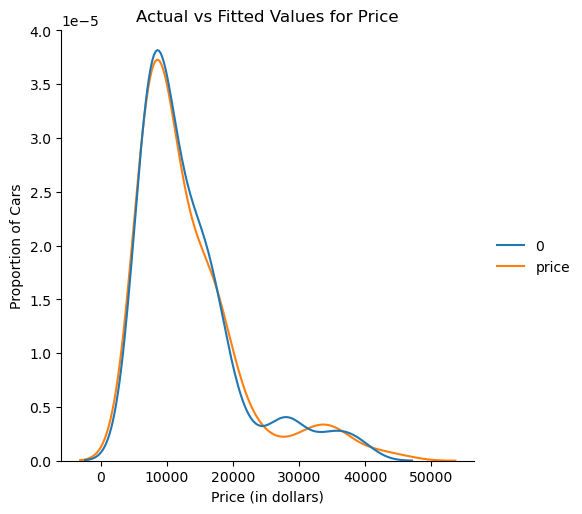

In [43]:
plt.figure(figsize=(4, 3))

sns.displot([Yhat,y], kind="kde")


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [44]:
#Let's calculate the R^2:
score = lm.score(X_multi_for,y)
print('The R-square is: ', score)

The R-square is:  0.9107482895970878


We can say that ~91.075 % of the variation of price is explained by this multiple linear regression.

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
#Let's calculate the MSE.
y_predict_multifit = lm.predict(X_multi_for)
print('The mean square error of price and predicted value using multifit is: ',\
      mean_squared_error(y, y_predict_multifit))

The mean square error of price and predicted value using multifit is:  5668415.03359499


___

## References
<br>[Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?datasetId=383055&sortBy=voteCount)</br>
การวิเคราะห์การถดถอยและการประยุกต์ใช้ด้วยโปรแกรม R ,รศ.ดร. เพียรพูล กมลจิตร์ประภา

___

Gawragod Kuchaiyaphum